# **Weibull Distribution Analysis**

## **(a) Number of Active Users Over Time for Weibull(k=0.5, λ=60)**

We use the survival function:

$$
P(T_u > t) = e^{-(t/60)^{0.5}}
$$

For \(N = 1000\), the expected number of active users at time \(t\) is:

$$
N_{active} = N \cdot P(T_u > t)
$$

In [102]:
from scipy.stats import weibull_min
print(
	(1 - weibull_min.cdf(150, 0.5, scale=60)) * 1000,
	(1 - weibull_min.cdf(24*60, 0.5, scale=60)) * 1000,
	(1 - weibull_min.cdf(2*24*60, 0.5, scale=60)) * 1000,
	(1 - weibull_min.cdf(5*24*60, 0.5, scale=60)) * 1000,
)

205.7406610838144 7.454186295369869 0.9797596903721173 0.01748003561785616


## **(b) Comparison for Different Weibull Distributions**

The survival function remains the same but varies with different \( k \) values:

$$
P(T_u > t) = e^{-(t/60)^k}
$$

| \( k \)  | 150 min | 1 day (1440 min) | 2 days (2880 min) | 5 days (7200 min) |
|------|---------|---------------|---------------|---------------|
| 0.5  | 205 | 7 | 0 | 0 |
| 1.0  | 82 | 0 | 0 | 0 |
| 1.5  | 19 | 0 | 0 | 0 |
| 2.5  | 0 | 0 | 0 | 0 |


In [103]:
# Different shape parameters
import numpy as np
N = 1000
scale = 60
shape_params = [0.5, 1.0, 1.5, 2.5]
time_points = [150, 1*24*60, 2*24*60, 5*24*60]

weibull_results = {}
for k in shape_params:
    probabilities = {t: np.exp(-(t/scale)**k) for t in time_points}
    weibull_results[k] = {t: int(N * p) for t, p in probabilities.items()}

print(weibull_results)

{0.5: {150: 205, 1440: 7, 2880: 0, 7200: 0}, 1.0: {150: 82, 1440: 0, 2880: 0, 7200: 0}, 1.5: {150: 19, 1440: 0, 2880: 0, 7200: 0}, 2.5: {150: 0, 1440: 0, 2880: 0, 7200: 0}}


## **(c) Gaussian Approximation**

We approximate the Weibull with a **Normal (Gaussian) Distribution** \(N(\mu, \sigma^2)\) to match user retention at **1 day and 2 days**.

[-3858.17904465  2176.20348311]


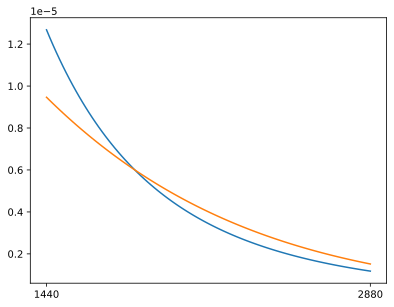

In [104]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from scipy.stats import norm

t1, t2 = 24*60, 2*24*60  # 1 day, 2 days
P1_weibull = 1 - weibull_min.cdf(t1, 0.5, scale=60)
P2_weibull = 1 - weibull_min.cdf(t2, 0.5, scale=60)

def objective(params):
    mu, sigma = params
    P1_gaussian = 1 - norm.cdf(t1, mu, sigma)
    P2_gaussian = 1 - norm.cdf(t2, mu, sigma)
    return (P1_gaussian - P1_weibull)**2 + (P2_gaussian - P2_weibull)**2

# Initial guess for (mu, sigma)
mu_init = t1
sigma_init = 500
result = minimize(objective, [mu_init, sigma_init], method='Nelder-Mead')

# Best-fit Gaussian parameters
mu_gaussian, sigma_gaussian = result.x
print(result.x)

x = np.linspace(24*60, 2*24*60, 100)
plt.xticks([24*60, 2*24*60, 3*24*60, 4*24*60, 5*24*60])
plt.plot(x, weibull_min.pdf(x, 0.5, scale=60))
plt.plot(x, norm.pdf(x, mu_gaussian, scale=sigma_gaussian))

In [105]:
1 - weibull_min.cdf(5*24*60, 0.5, scale=60)

np.float64(1.748003561785616e-05)

In [106]:
1 - norm.cdf(5*24*60, mu_gaussian, scale=sigma_gaussian)

np.float64(1.8732315698599677e-07)

## **(d) Large-Scale Simulation (1,000,000 Users Over 1 Year)**

Each user joins randomly over **1 year (525,600 minutes)** and stays active according to \( W(0.5, 60) \).


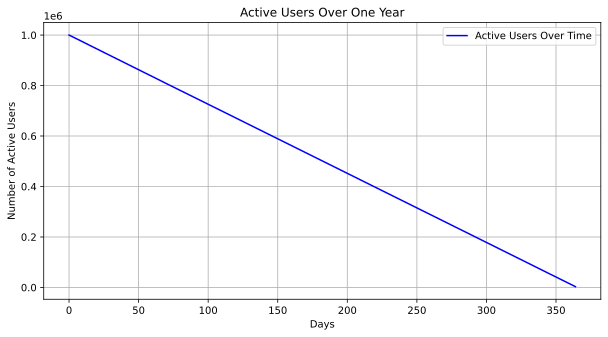

In [108]:
import matplotlib.pyplot as plt

N_large = 1000000

tu = np.random.uniform(0, 365*24*60, N_large)  # Random entry times
Tu = np.random.weibull(0.5, N_large) * 60  # Weibull active times

days = np.arange(0, 365)
active_per_day = [np.sum((tu + Tu) > (day * 24*60)) for day in days]

plt.figure(figsize=(10, 5))
plt.plot(days, active_per_day, label='Active Users Over Time', color='b')
plt.xlabel('Days')
plt.ylabel('Number of Active Users')
plt.title('Active Users Over One Year')
plt.legend()
plt.grid()
plt.show()